In [42]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import numpy as np
import pandas as pd
import pickle as pkl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

In [44]:
from transformers import pipeline
from transformers import AutoTokenizer

In [45]:
model_name = 'nlptown/bert-base-multilingual-uncased-sentiment'
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

pkl.dump(model, open('tf_model.pkl','wb'))

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [46]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer


english_stopwords = stopwords.words('english')

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

stemmer = SnowballStemmer(language='english')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='tf')]

vectorizer = CountVectorizer(lowercase=True, 
                             tokenizer=tokenizer,
                             stop_words=english_stopwords,
                             max_features=1000)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
df = pd.read_csv('tweets.csv')

df['Result'] = df['Tweet'].apply(lambda x: classifier(x))
df['sentiment'] = df['Result'].apply(lambda x: (x[0]['label']))


train_inputs = df['Tweet']
train_targets = df['sentiment']

vectorizer.fit(train_inputs)
train_inputs = vectorizer.transform(train_inputs)

model = LogisticRegression(max_iter=1000, solver='sag')
model.fit(train_inputs, train_targets)

preds = model.predict(train_inputs)

print('Accuracy of trained model: ',accuracy_score(train_targets, preds))

Accuracy of trained model:  0.55


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['attention_mask', 'input_ids', 'token_type_ids'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [48]:
pkl.dump(model, open('model.pkl','wb'))









In [49]:
model = pkl.load(open('model.pkl', 'rb'))

In [50]:
df2 = pd.read_csv('tweets_2.csv')

train_inputs = df2['Tweet']
vectorizer.fit(train_inputs)
inputs = vectorizer.transform(train_inputs)
preds = model.predict(inputs)
dp = []
dp2 = []

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [51]:
def graphs(dp,dp2):
  plt.rcParams['figure.figsize'] = [7.5, 3.5]
  plt.rcParams['figure.autolayout'] = True
  x = np.linspace(-2,2,10)
  plt.legend(['Predictions', 'Actual'])
  plt.plot(dp)
  plt.plot(dp2)
  savefig('graphs.png')

In [52]:
def pie(dp,dp2,df5):
  df5 = pd.DataFrame({'labels': df5.index,'values': df5['sentiment']})
  labels = df5['labels']
  sizes = df5['values']
  colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
  patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
  plt.legend(patches, labels, loc="best")
  plt.axis('equal')
  plt.tight_layout()
  plt.savefig('chart.png', dpi=300, bbox_inches='tight')
  plt.show()
  plt.rcParams['figure.figsize'] = [7.5, 3.5]
  plt.rcParams['figure.autolayout'] = True
  x = np.linspace(-2,2,10)
  graphs(dp,dp2)
  # plt.plot(dp)
  # plt.plot(dp2)
  # plt.savefig('graphs.png', dpi=300, bbox_inches='tight')

In [53]:
def iterate(inputs):
  inputs['Result'] = inputs['Tweet'].apply(lambda x: classifier(x))
  inputs['sentiment'] = inputs['Result'].apply(lambda x: (x[0]['label']))

  new_inputs = inputs['Tweet']
  new_targets = inputs['sentiment']

  vectorizer.fit(new_inputs)
  new_inputs = vectorizer.transform(new_inputs)

  new_preds = model.predict(new_inputs)
  print(pd.Series(new_preds).value_counts())
  print(pd.Series(new_targets).value_counts())

  a = pd.Series(new_preds).value_counts()
  b = pd.Series(new_targets).value_counts()

  dp.append(a[0])
  dp2.append(b[0])

  # graphs(dp,dp2)

  df5 = pd.DataFrame(pd.Series(new_targets).value_counts())

  print('Accuracy is : ',accuracy_score(new_targets, new_preds))
  pie(dp,dp2,df5)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


1 star    100
dtype: int64
1 star     70
5 stars    14
4 stars     9
3 stars     5
2 stars     2
Name: sentiment, dtype: int64
Accuracy is :  0.7


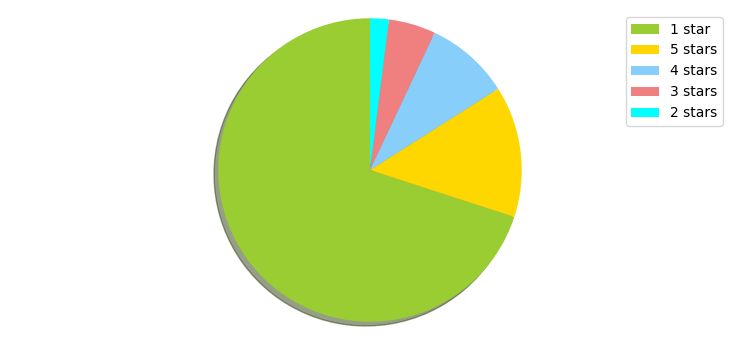

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


1 star    100
dtype: int64
1 star     55
5 stars    21
4 stars    14
2 stars     8
3 stars     2
Name: sentiment, dtype: int64
Accuracy is :  0.55


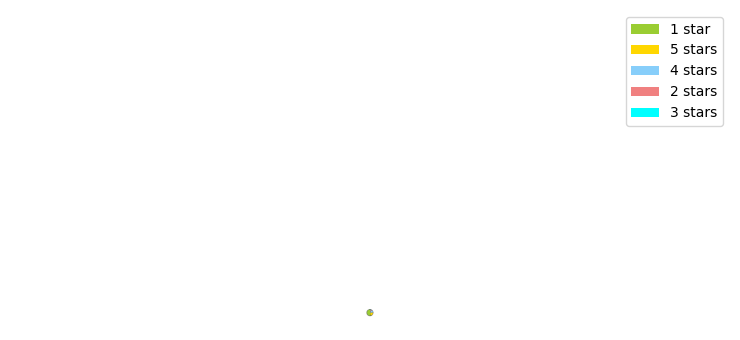

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


1 star    100
dtype: int64
1 star     50
5 stars    16
4 stars    14
3 stars    13
2 stars     7
Name: sentiment, dtype: int64
Accuracy is :  0.5


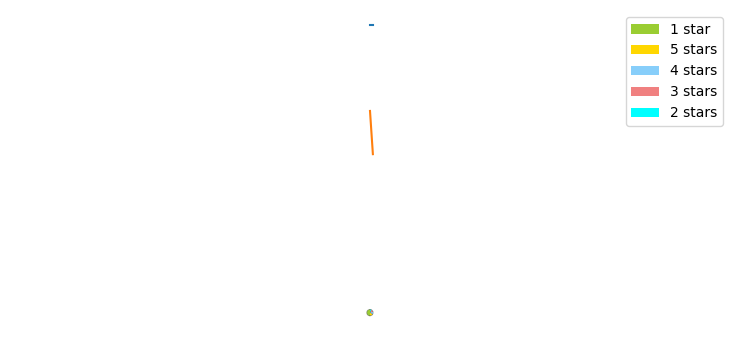

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


1 star    100
dtype: int64
1 star     55
2 stars    18
5 stars    12
3 stars    10
4 stars     5
Name: sentiment, dtype: int64
Accuracy is :  0.55


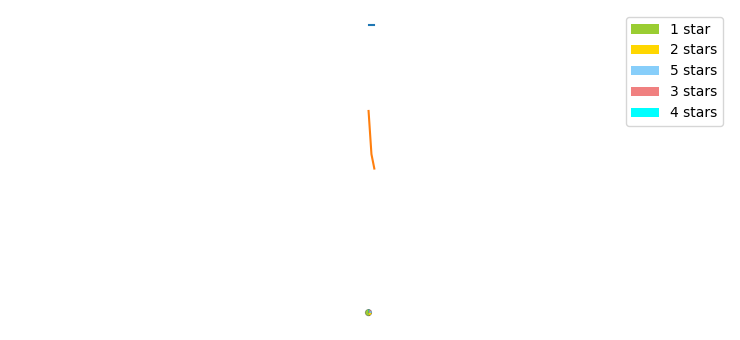

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


1 star    100
dtype: int64
4 stars    43
1 star     31
3 stars    12
5 stars     8
2 stars     6
Name: sentiment, dtype: int64
Accuracy is :  0.31


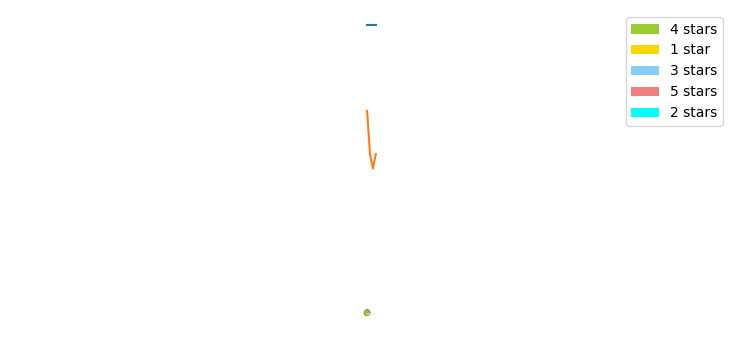

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


1 star    100
dtype: int64
4 stars    83
1 star     11
5 stars     5
3 stars     1
Name: sentiment, dtype: int64
Accuracy is :  0.11


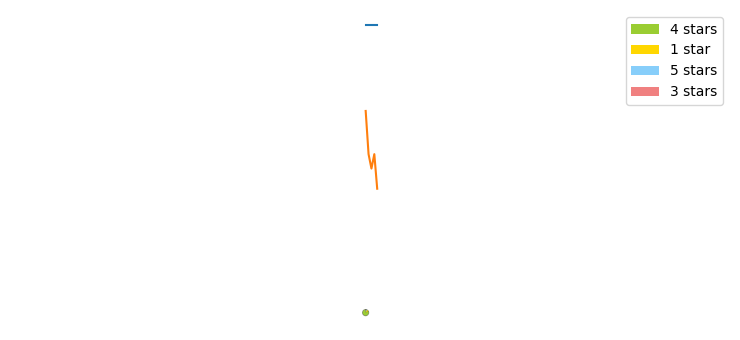

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


1 star    100
dtype: int64
4 stars    76
1 star     21
2 stars     1
3 stars     1
5 stars     1
Name: sentiment, dtype: int64
Accuracy is :  0.21


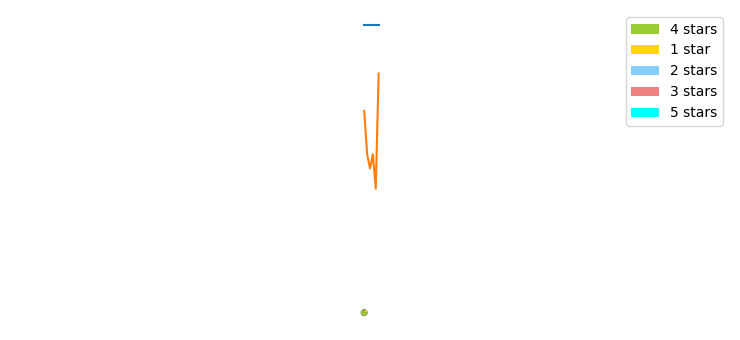

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


1 star    45
dtype: int64
1 star     24
4 stars    13
5 stars     4
3 stars     4
Name: sentiment, dtype: int64
Accuracy is :  0.5333333333333333


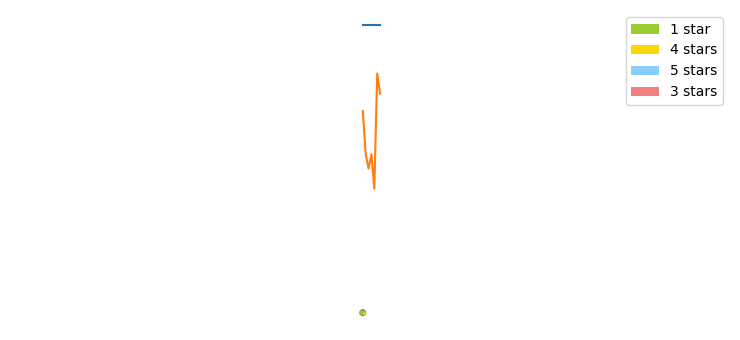

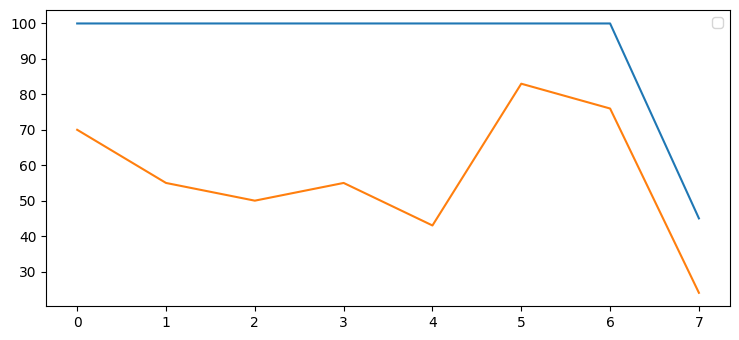

In [54]:
groups = np.arange(len(df2.iloc[:,3:4])) // 100
for idx, subset in df2.groupby(groups):
    iterate(pd.DataFrame(subset.Tweet))